<a href="https://colab.research.google.com/github/alonsosilvaallende/Concordance_Index/blob/master/Concordance_index_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concordance index
[Alonso Silva](http://www.dim.uchile.cl/~alsilva/) [(@alonsosilva)](https://twitter.com/alonsosilva) | 2019/10/08

In [0]:
# install lifelines
!pip install -q lifelines

In [0]:
# usual imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import concordance index
from lifelines.utils import concordance_index

%matplotlib inline

The _concordance index_ or _c-index_ is a metric to evaluate the predictions made by an algorithm. It is defined as the proportion of concordant pairs divided by the total number of possible evaluation pairs. Let's see through some examples what does this definition mean in practice.

Suppose we are a telecom operator with 5 customers (Alice, Bob, Carol, Dave, and Eve) and we're trying to predict who are going to unsubscribe from our services (also known as churn) first.

Suppose that Alice left after 1 year, Bob after 2 years, Carol after 3 years, Dave after 4 years and Eve after 5 years. 

Suppose that our algorithm made the following prediction: Alice will leave after 1 year, Bob after 2 years, Carol after 3 years, Dave after 4 years, and Eve after 5 years. In that case, the concordance index is equal to its maximum value 1.

In [3]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
events = [1, 2, 3, 4, 5]
preds = [1, 2, 3, 4, 5]
df = pd.DataFrame(data={'Churn times': events, 'Predictions': preds}, index=names)
print(df)
print(f'Concordance index: {concordance_index(events, preds)}')

       Churn times  Predictions
Alice            1            1
Bob              2            2
Carol            3            3
Dave             4            4
Eve              5            5
Concordance index: 1.0


However, the concordance index is interested on the **order of the predictions**, not the predictions themselves. Assume now that the algorithm predicted that: Alice will leave after 2 years, Bob after 3 years, Carol after 5 years, Dave after 8 years and Eve after 14 years. In that case, the concordance index is still equal to its maximum value 1 since the order of the predictions is right.

In [4]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
events = [1, 2, 3, 4, 5]
preds = [2, 3, 5, 8, 14]
df = pd.DataFrame(data={'Churn times': events, 'Predictions': preds}, index=names)
print(df)
print(f'Concordance index: {concordance_index(events, preds)}')

       Churn times  Predictions
Alice            1            2
Bob              2            3
Carol            3            5
Dave             4            8
Eve              5           14
Concordance index: 1.0


This is very different from other evaluation measures such as [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) or [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error). Actually for any strictly increasing function the concordance index will still be equal to 1. Here is an example with the logarithm function:

In [5]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
events = [1, 2, 3, 4, 5]
preds = np.log(events)
df = pd.DataFrame(data={'Churn times': events, 'Predictions': preds}, index=names)
print(df)
print(f'Concordance index: {concordance_index(events, preds)}')

       Churn times  Predictions
Alice            1     0.000000
Bob              2     0.693147
Carol            3     1.098612
Dave             4     1.386294
Eve              5     1.609438
Concordance index: 1.0


Let's consider the case where the algorithm got the order of the predictions completely wrong. Let's say the algorithm predicted that Eve will churn first after 1 year, Dave after 2 years, Carol after 3 years, Dave after 4 years, and Alice after 5 years, so the order is completely reversed (although notice that Carol did leave after 3 years!). In that case, the concordance index will be equal to its minimum value 0 since the order of the predictions is wrong.

In [6]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
events = [1, 2, 3, 4, 5]
preds = [5, 4, 3, 2, 1]
df = pd.DataFrame(data={'Churn times': events, 'Predictions': preds}, index=names)
print(df)
print(f'Concordance index: {concordance_index(events, preds)}')

       Churn times  Predictions
Alice            1            5
Bob              2            4
Carol            3            3
Dave             4            2
Eve              5            1
Concordance index: 0.0


Actually the concordance index will be zero for every strictly decreasing function of the churn times. Here is an example for $f(x)=1/x$:

In [7]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
events = [1, 2, 3, 4, 5]
preds = [1/event for event in events]
df = pd.DataFrame(data={'Churn dates': events, 'Predictions': preds}, index=names)
print(df)
print(f'Concordance index: {concordance_index(events, preds)}')

       Churn dates  Predictions
Alice            1     1.000000
Bob              2     0.500000
Carol            3     0.333333
Dave             4     0.250000
Eve              5     0.200000
Concordance index: 0.0


Now comes the interesting part. What does the concordance index do when the order of the predictions is not completely right, nor completely wrong? Which score do you give to the following prediction:
+ *Prediction 1*: Alice will leave after 3 years, Bob after 2 years, Carol after 1 year, Dave after 5 years, and Eve after 4 years.

Well, the concordance index lists all the possible pairs, in our case there are 10 potential pairs:
1. Alice and Bob
2. Alice and Carol
3. Alice and Dave
4. Alice and Eve
5. Bob and Carol
6. Bob and Dave
7. Bob and Eve
8. Carol and Dave
9. Carol and Eve
10. Dave and Eve

and then it counts how many of the order of these predictions of pairs were right. For example, for *Prediction 1*: 

1. <font color='red'>Alice is predicted to churn after Bob, while in reality Bob churns after Alice.</font>
2. <font color='red'>Alice is predicted to churn after Carol, while Carol churned after Alice.</font>
3. <font color='blue'>Alice is predicted to churn before Dave, and Alice did churn before Dave.</font>
4. <font color='blue'>Alice is predicted to churn before Eve, and Alice did churn before Eve.</font>
5. <font color='red'>Bob is predicted to churn after Carol, while Carol churned after Bob.</font>
6. <font color='blue'>Bob is predicted to churn before Dave, and Bob did churn before Dave.</font>
7. <font color='blue'>Bob is predicted to churn before Eve, and Bob did churn before Eve.</font>
8. <font color='blue'>Carol is predicted to churn before Dave, and Carol did churn before Dave.</font>
9. <font color='blue'>Carol is predicted to churn before Eve, and Carol did churn before Eve.</font>
10. <font color='red'>Dave is predicted to churn after Eve, while Eve churned after Dave.</font>

There are 6 concordant pairs out of 10 possible pairs so the concordance index is equal to 6/10 or 0.6.


In [8]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
events = [1, 2, 3, 4, 5]
preds = [3, 2, 1, 5, 4]
df = pd.DataFrame(data={'Churn times': events, 'Predictions': preds}, index=names)
print(df)
print(f'Concordance index: {concordance_index(events, preds)}')

       Churn times  Predictions
Alice            1            3
Bob              2            2
Carol            3            1
Dave             4            5
Eve              5            4
Concordance index: 0.6


What happens in case of ties? Ties are counted as half concordant pair:

In [9]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
events = [1, 2, 3, 4, 5]
preds = [1, 2, 3, 4, 4]
df = pd.DataFrame(data={'Name': names, 'Churn times': events, 'Predictions': preds}, index=names)
print(df)
print(f'Concordance index: {concordance_index(events, preds)}')

        Name  Churn times  Predictions
Alice  Alice            1            1
Bob      Bob            2            2
Carol  Carol            3            3
Dave    Dave            4            4
Eve      Eve            5            4
Concordance index: 0.95


Another interesting characteristic of the concordance index is that it supports right censoring, i.e., the case when by the end of the study, the event of interest (for example, in medicine 'death of a patient' or in our example 'churn of a customer') has only occurred for a subset of the observations.

Up to now, we never had to specify if our observations were right censored or not because the concordance index default option is that all events are observed. Let's change that.

Suppose that Alice churned after 1 year, Bob after 2 years, <font color='green'>Carol haven't churned after 3 years</font>, Dave churned after 4 years and Eve after 5 years.

and our prediction is the following:

+ *Prediction 2*: Alice will churn after 1 year, Bob after 2 years, Carol after 3 years, Dave after 5 years, and Eve after 4 years.


Now we cannot give a score to the pairs (Carol, Dave) and (Carol, Eve) since we simply don't know who churned first. Therefore we only have 8 potential pairs:

1. <font color='blue'>Alice is predicted to churn before Bob, and Alice did churn before Bob.</font>
2. <font color='blue'>Alice is predicted to churn before Carol, and Alice did churn before Carol.</font>
3. <font color='blue'>Alice is predicted to churn before Dave, and Alice did churn before Dave.</font>
4. <font color='blue'>Alice is predicted to churn before Eve, and Alice did churn before Eve.</font>
5. <font color='blue'>Bob is predicted to churn before Carol, and Bob did churn before Carol.</font>
6. <font color='blue'>Bob is predicted to churn before Dave, and Bob did churn before Dave.</font>
7. <font color='blue'>Bob is predicted to churn before Eve, and Bob did churn before Eve.</font>
8. <font color='red'>Dave is predicted to churn after Eve, while Eve churned after Dave.</font>

Therefore the concordance index is equal to 7/8 or 0.875.

In [10]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
times = [1, 2, 3, 4, 5]
preds = [1, 2, 3, 5, 4]
event_obs = [True, True, False, True, True]
df = pd.DataFrame(data={'Times': times, 'Predictions': preds, 'Event observed?': event_obs}, index=names)
print(df)
print(f'Concordance index: {concordance_index(events, preds, event_obs)}')

       Times  Predictions  Event observed?
Alice      1            1             True
Bob        2            2             True
Carol      3            3            False
Dave       4            5             True
Eve        5            4             True
Concordance index: 0.875


## Difference between libraries

Lifelines concordance index inputs are:

+ event/censoring times
+ predicted scores
+ event observed (*optional*). The default assumes all events observed.

Lifelines concordance index output is:

+ concordance index

Let's compare the concordance index of [lifelines](https://lifelines.readthedocs.io/en/latest/) with the ones provided by [scikit-survival](https://scikit-survival.readthedocs.io/en/latest/) and [PySurvival](https://pysurvival.io) libraries.

In [0]:
!pip install -q pysurvival scikit-survival

In [0]:
from lifelines.utils import concordance_index as ci_lifelines
from pysurvival.utils.metrics import concordance_index as ci_pysurvival
from sksurv.metrics import concordance_index_censored as ci_scikit

Scikit-survival's concordance index inputs are:
+ event observed
+ event/censoring times
+ predicted risks
+ tied tolerance (float, optional, default: 1e-8) – The tolerance value for considering ties. If the absolute difference between risk scores is smaller or equal than tied_tol, risk scores are considered tied. 

Scikit-survival's concordance index outputs are:

+ Concordance index
+ Number of concordant pairs
+ Number of discordant pairs
+ Number of pairs having tied estimated risks
+ Number of comparable pairs sharing the same time


Notice that lifelines gives the concordance between the actuals and the predicted *scores*, while scikit-survival gives the concordance between the actuals and the predicted *risks*, so over the same lists, they are the complete opposite.

$$
\textrm{Concordance-index (lifelines)}= 1-\textrm{Concordance-index (scikit-survival)}
$$


In [13]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
events = [1, 2, 3, 4, 5]
preds = [1, 2, 3, 4, 5]
event_obs = [True, True, True, True, True]
df = pd.DataFrame(data={'Times': times, 'Predictions': preds, 'Event observed?': event_obs}, index=names)
print(df)
print(f'Concordance index (lifelines): {ci_lifelines(events, preds, event_obs)}')
print(f'Concordance-index (scikit-survival): {ci_scikit(event_obs, events, preds)[0]}')

       Times  Predictions  Event observed?
Alice      1            1             True
Bob        2            2             True
Carol      3            3             True
Dave       4            4             True
Eve        5            5             True
Concordance index (lifelines): 1.0
Concordance-index (scikit-survival): 0.0


As mentioned above, scikit survival also gives the number of concordant pairs, number of discordant pairs, number of pairs having tied estimated risks, and the number of comparable pairs sharing the same time.

In [14]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
events = [1, 2, 3, 4, 5]
preds = [5, 4, 3, 2, 1]
event_obs = [True, True, True, True, True]
df = pd.DataFrame(data={'Times': times, 'Predictions': preds, 'Event observed?': event_obs}, index=names)
print(df)
print(f'Concordance-index (scikit-survival): {ci_scikit(event_obs, events, preds)[0]}')
print(f'Number of concordant pairs (scikit-survival): {ci_scikit(event_obs, events, preds)[1]}')
print(f'Number of discordant pairs (scikit-survival): {ci_scikit(event_obs, events, preds)[2]}')
print(f'Number of pairs having tied estimated risks (scikit-survival): {ci_scikit(event_obs, events, preds)[3]}')
print(f'Number of comparable pairs sharing the same time (scikit-survival): {ci_scikit(event_obs, events, preds)[4]}')

       Times  Predictions  Event observed?
Alice      1            5             True
Bob        2            4             True
Carol      3            3             True
Dave       4            2             True
Eve        5            1             True
Concordance-index (scikit-survival): 1.0
Number of concordant pairs (scikit-survival): 10
Number of discordant pairs (scikit-survival): 0
Number of pairs having tied estimated risks (scikit-survival): 0
Number of comparable pairs sharing the same time (scikit-survival): 0


Let's see a more interesting example:

In [15]:
names = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve']
times = [1, 2, 3, 4, 5]
preds = [4, 5, 3, 2, 1]
event_obs = [True, True, False, True, True]
df = pd.DataFrame(data={'Times': times, 'Predictions': preds, 'Event observed?': event_obs}, index=names)
print(df)
print(f'Concordance-index (scikit-survival): {ci_scikit(event_obs, events, preds)[0]}')
print(f'Number of concordant pairs (scikit-survival): {ci_scikit(event_obs, events, preds)[1]}')
print(f'Number of discordant pairs (scikit-survival): {ci_scikit(event_obs, events, preds)[2]}')
print(f'Number of pairs having tied estimated risks (scikit-survival): {ci_scikit(event_obs, events, preds)[3]}')
print(f'Number of comparable pairs sharing the same time (scikit-survival): {ci_scikit(event_obs, events, preds)[4]}')

       Times  Predictions  Event observed?
Alice      1            4             True
Bob        2            5             True
Carol      3            3            False
Dave       4            2             True
Eve        5            1             True
Concordance-index (scikit-survival): 0.875
Number of concordant pairs (scikit-survival): 7
Number of discordant pairs (scikit-survival): 1
Number of pairs having tied estimated risks (scikit-survival): 0
Number of comparable pairs sharing the same time (scikit-survival): 0


PySurvival concordance index inputs are:
+ a model
+ input samples
+ event/censoring times
+ event observed

PySurvival concordance index outputs are:
+ the concordance index
+ if additional_results=True 
  - Number of pairs
  - Number of concordant pairs

PySurvival concordance index needs a model as input so it's harder to see what does the concordance index do. Let's try it with a Random survival forest:

In [0]:
np.random.seed(42)
x = np.linspace(0,10)
y = x + np.random.normal(0, 1, x.shape)
x1 = x[...,None] # we add a dimension so that RandomSurvivalForestModel doesn't complain
x_trn, x_val = x1[:40], x1[40:]
y_trn, y_val = y[:40], y[40:]
event_obs_trn = [True for i in range(len(x_trn))]
event_obs_val = [True for i in range(len(x_val))]

In [17]:
from pysurvival.models.survival_forest import RandomSurvivalForestModel

rsf = RandomSurvivalForestModel(num_trees=20)
rsf.fit(x_trn, y_trn, event_obs_trn, seed=0)
print(f'Concordance-index (PySurvival): {ci_pysurvival(rsf, x_trn, y_trn, event_obs_trn, additional_results=False):.3f}')
print(f'Concordance index (lifelines): {ci_lifelines(y_trn, -rsf.predict_risk(x_trn), event_obs_trn):.3f}')
print(f'Concordance index (scikit-survival): {ci_scikit(event_obs_trn, y_trn, rsf.predict_risk(x_trn))[0]:.3f}')

Concordance-index (PySurvival): 0.830
Concordance index (lifelines): 0.830
Concordance index (scikit-survival): 0.830


We notice that the three concordance indexes give us the same result. Let's look at the additional results:

In [18]:
print(f'Number of total pairs (pysurvival): {ci_pysurvival(rsf, x_trn, y_trn, event_obs_trn, additional_results=True)[1]:.0f}')
print(f'Number of concordant pairs (pysurvival): {ci_pysurvival(rsf, x_trn, y_trn, event_obs_trn, additional_results=True)[2]:.0f}')
print(f'Number of concordant pairs (scikit-survival): {ci_scikit(event_obs_trn, y_trn, rsf.predict_risk(x_trn))[1]}')
print(f'Number of discordant pairs (scikit-survival): {ci_scikit(event_obs_trn, y_trn, rsf.predict_risk(x_trn))[2]}')
print(f'Number of pairs having tied estimated risks (scikit-survival): {ci_scikit(event_obs_trn, y_trn, rsf.predict_risk(x_trn))[3]}')
print(f'Number of comparable pairs sharing the same time (scikit-survival): {ci_scikit(event_obs_trn, y_trn, rsf.predict_risk(x_trn))[4]}')

Number of total pairs (pysurvival): 1560
Number of concordant pairs (pysurvival): 1295
Number of concordant pairs (scikit-survival): 558
Number of discordant pairs (scikit-survival): 43
Number of pairs having tied estimated risks (scikit-survival): 179
Number of comparable pairs sharing the same time (scikit-survival): 0


We notice that PySurvival counts pairs two times (Alice, Bob) and (Bob, Alice) while scikit-survival counts it only once. That explains the difference between the number of concordant pairs.

Let's do random predictions and see the concordance index we obtain.

In [0]:
actuals = np.arange(0,10,1)

# choose 20 random seeds
np.random.seed(0)
seeds = np.random.permutation(1000)[:100]

ci_random = []
for _seed in seeds:
  np.random.seed(_seed); preds_random = np.random.permutation(np.arange(0,10,1))
  ci_random.append(ci_lifelines(actuals,preds_random))

In [20]:
print(f'Mean concordance index of random predictions: {np.mean(ci_random):.3f}')

Mean concordance index of random predictions: 0.517


Let's see the concordance indexes of our random predictions in a box plot:

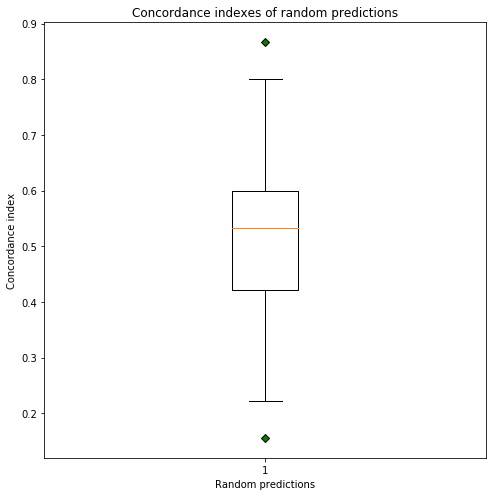

In [21]:
data = ci_random
green_diamond = dict(markerfacecolor='g', marker='D')

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.set_title('Concordance indexes of random predictions')
ax1.boxplot(data, notch=False, flierprops=green_diamond)
ax1.set_xlabel('Random predictions')
ax1.set_ylabel('Concordance index')
plt.tight_layout()
plt.show()

## Conclusions

Concordance index is a useful metric to evaluate the predictions made by an algorithm. It can consider the case of right-censoring, i.e., when by the end of the study, the event of interest (for example, in medicine 'death of a patient' or in our example 'churn of a customer') has only occurred for a subset of the observations. We have seen three libraries (lifelines, scikit-survival, and PySurvival) who implement the concordance index but with some subtle differences.

**Sources**

+ Harrell F.E Jr., Lee K.L., Mark D.B., ["Multivariable prognostic models: issues in developing models, evaluating assumptions and adequacy, and measuring and reducing errors"](https://doi.org/10.1002/(SICI)1097-0258(19960229)15:4%3C361::AID-SIM168%3E3.0.CO;2-4), Statistics in Medicine, 15(4), 361-87, 1996.
+ [Lifelines' concordance index](https://lifelines.readthedocs.io/en/latest/lifelines.utils.html#lifelines.utils.concordance_index)
+ [Scikit-survival's concordance index](https://scikit-survival.readthedocs.io/en/latest/generated/sksurv.metrics.concordance_index_censored.html#sksurv.metrics.concordance_index_censored)
+ [PySurvival's concordance index](https://square.github.io/pysurvival/metrics/c_index.html)